In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv("Churn data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Replacing blanks with 0 as tenure is 0 and no total charges are recoderd

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(r"^\s*$", "0", regex=True)
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [8]:
df.shape

(7043, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.size

147903

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [52]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
df.duplicated().sum()

np.int64(0)

In [15]:
def conv(value):
  if value== 1:
    return "yes"
  else:
    return "no"
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

# Converted 0 and 1 values of Senior Citizen to yes/no to make it easier to understand

In [ ]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


Text(0.5, 1.0, 'Count of customers by Churn')

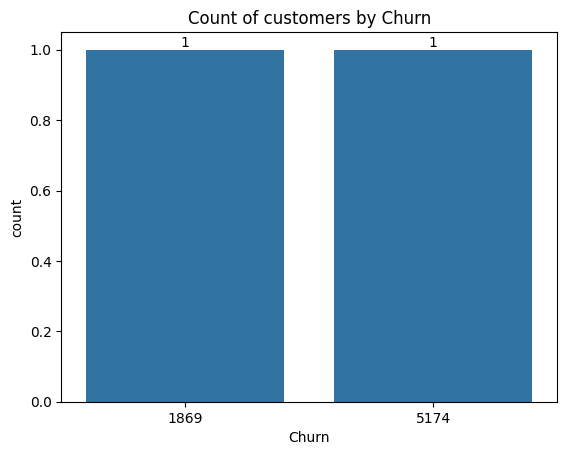

In [28]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")

<Axes: xlabel='gender', ylabel='count'>

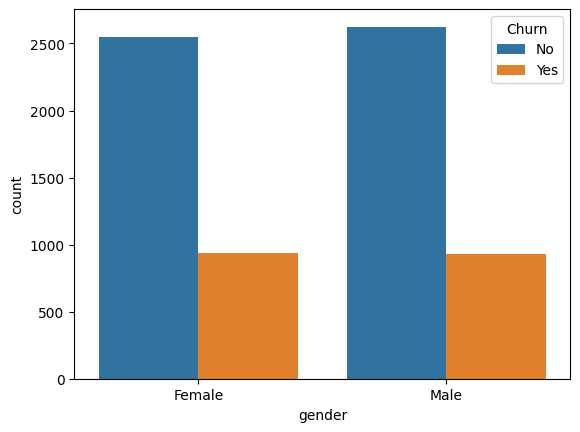

In [35]:
sns.countplot(x="gender", data=df,hue="Churn")

Text(0.5, 1.0, ' Churn by Senior Citizen')

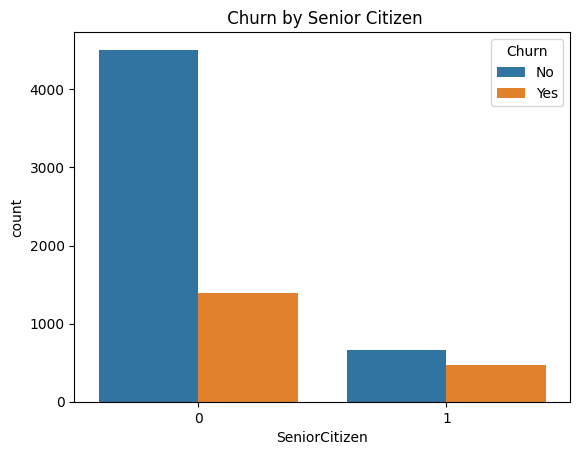

In [38]:
sns.countplot(x="SeniorCitizen", data=df,hue="Churn")
plt.title(" Churn by Senior Citizen")

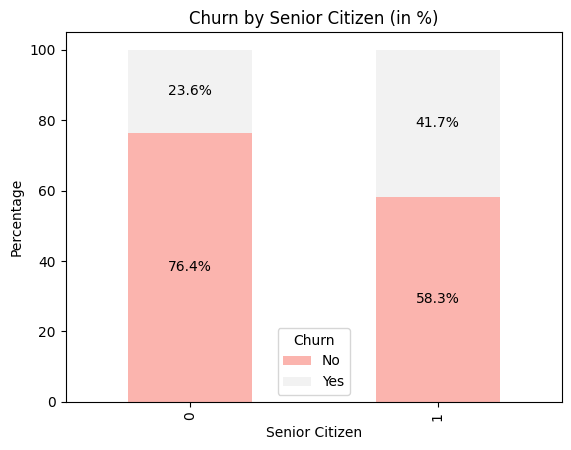

In [45]:

grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
ax = percentages.plot(kind='bar', stacked=True, colormap='Pastel1')


for i, row in enumerate(percentages.values):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            plt.text(i, cumulative + val/2, f"{val:.1f}%", ha='center', va='center', fontsize=10)
            cumulative += val

plt.title("Churn by Senior Citizen (in %)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title='Churn')
plt.show()


Text(0.5, 1.0, ' Count of customers by Senior Citizen')

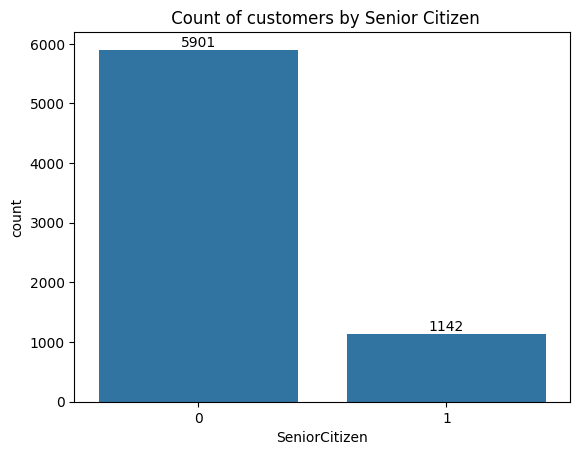

In [42]:
ax=sns.countplot(x="SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title(" Count of customers by Senior Citizen")

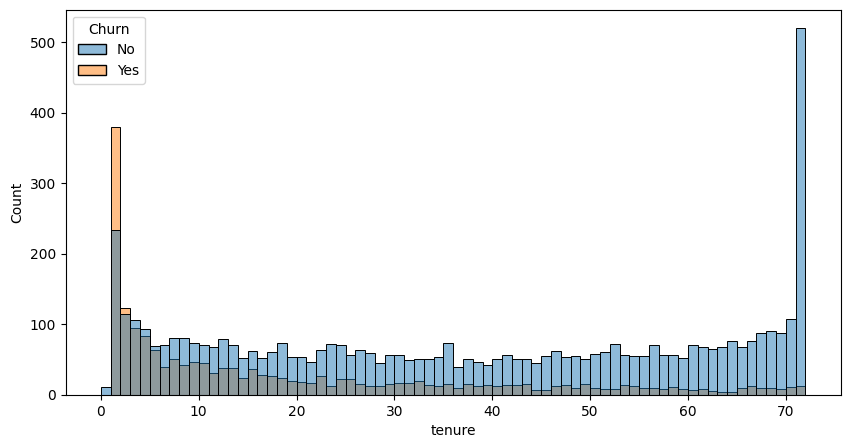

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(x="tenure", data=df,bins=72,hue="Churn")
plt.show()

Text(0.5, 1.0, ' Count of customers by Contract')

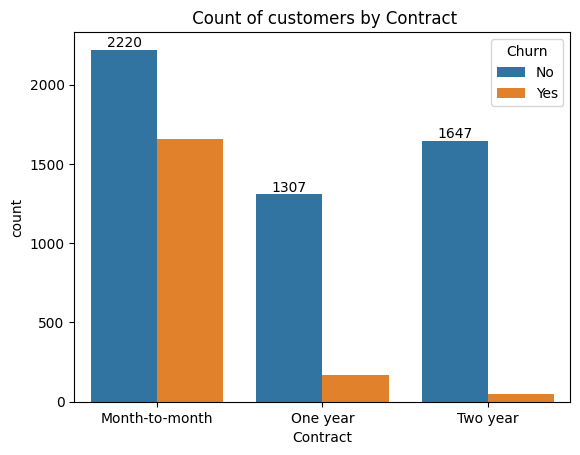

In [51]:
ax=sns.countplot(x="Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title(" Count of customers by Contract")

<ipython-input-53-40a27480197d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='pastel')
<ipython-input-53-40a27480197d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='pastel')
<ipython-input-53-40a27480197d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='pastel')
<ipython-input-53-40a27480197d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

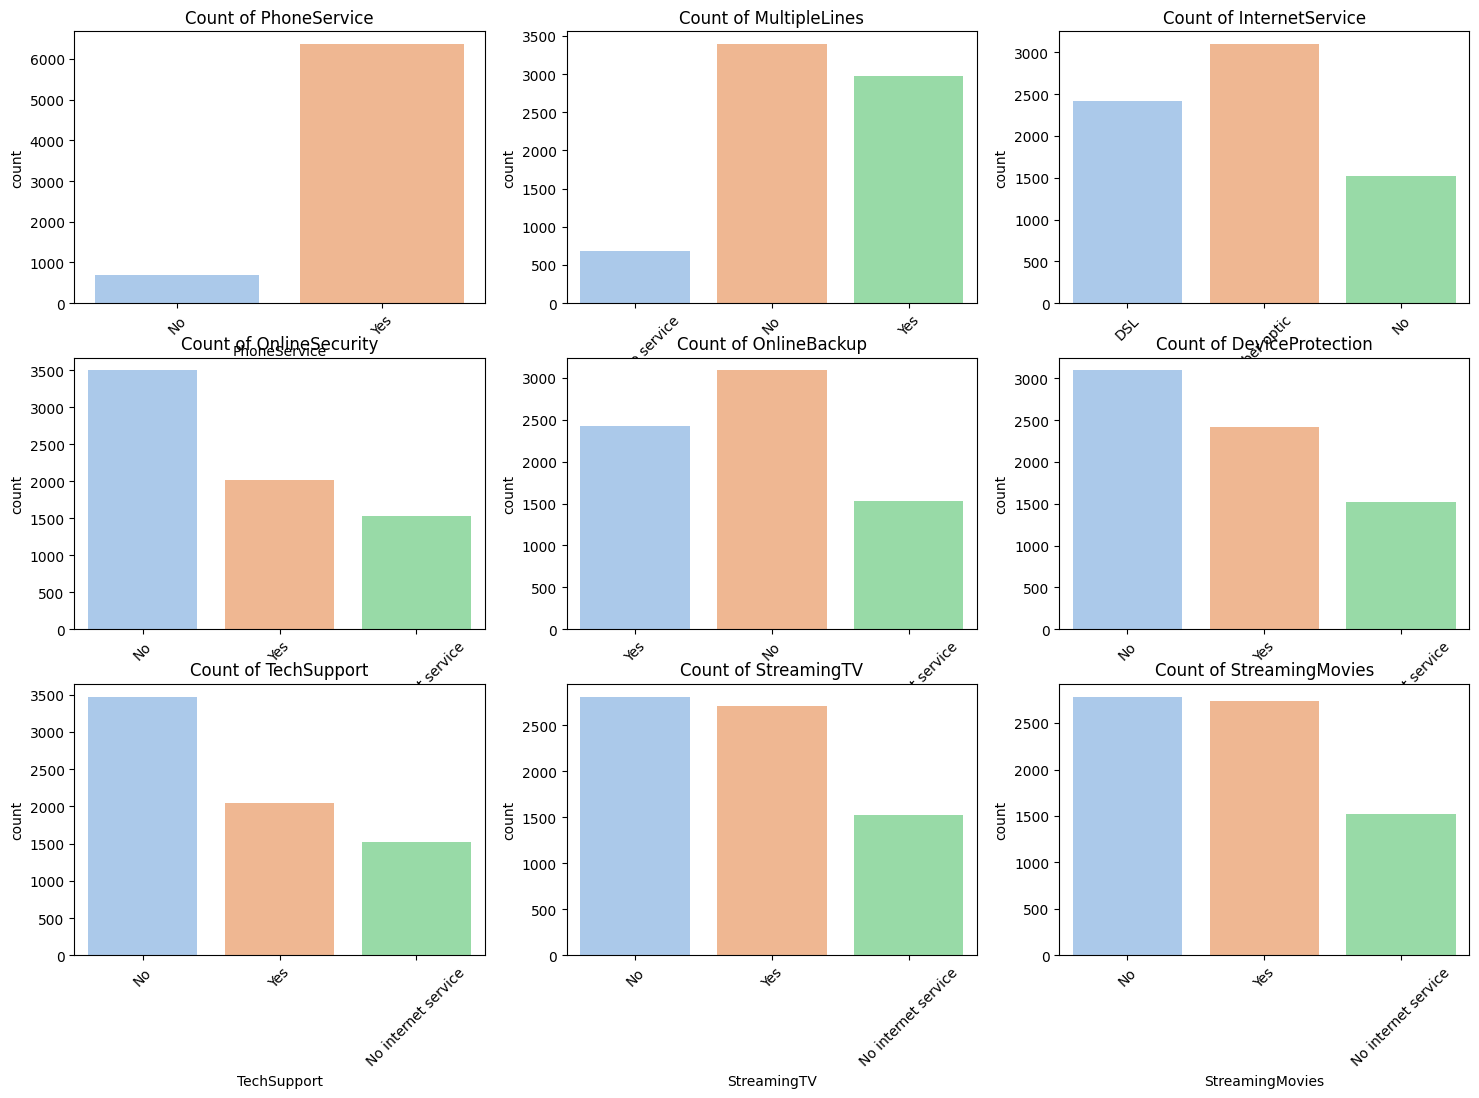

In [53]:

cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))


axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='pastel')
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis='x', rotation=45)


plt.show()


Text(0.5, 1.0, ' Churned customers by Payment Method')

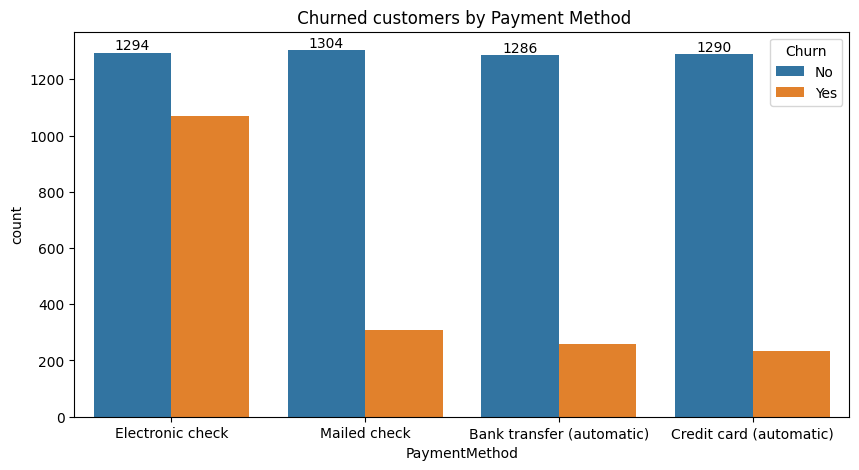

In [56]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title(" Churned customers by Payment Method")